# IMPORTING ALL LIBRARIES

In [2]:
#Importing all necessary libraries
import tweepy
from datetime import date
import datetime
import GetOldTweets3 as got
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
#nltk.download('stopwords')
#!pip install symspellpy
#!pip install spacy
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources
import re, string, json
import spacy
from tqdm.notebook import tqdm
import nltk
nltk.download('punkt')
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid= False)
import seaborn as sns
!pip install jupyterthemes
nltk.download('punkt')
nltk.download('wordnet')
from textaugment import Wordnet, Translate
import nltk
nltk.download('punkt')
nltk.download('wordnet')
!pip install textaugment
from textaugment import Wordnet, Translate
nltk.download('averaged_perceptron_tagger')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')


[nltk_data] Downloading package punkt to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ifeanyi Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Ifeanyi
[nltk_data]     Uzowuru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# IMPORTING TWEETS WITH SEARCH TERMS    
# 'GSU','GEORGIA STATE UNIVERSITY'

In [3]:
#SCRAPING DATA FROM TWITTER API USING IDENTITY KEYS

consumer_key = "8GVwuToomfazOQ2PcoTMOYbqx"
consumer_secret = "mPkj0I8sEJPSUqGJ2olIEaiY7euaq78CSe8MdSX8s3PQpadQHt"
access_token = "391841745-rqW5hq4CiBLh3oobBSBH1gOgfY0Ntm96w5U40In5"
access_token_secret = "RAfphJJkutjeIgfkkjhFUbx0brrZd2Fhh5idtGT2TMpDw"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


# Function created to extract coordinates from tweet if it has coordinate info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None
# Function created to extract place such as city, state or country from tweet if it has place info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None

In [5]:
#SEARCHING WITH 'GSU' AND EXPORTING TWEETS TO MY DOWNLOADS
text_query = '#GSU'
count = 100
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search_tweets,q=text_query).items(count)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.text, tweet.created_at, tweet.user.name, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.statuses_count, tweet.user.profile_image_url_https] for tweet in tweets]
#tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name, tweet.coordinates, tweet.place, tweet.retweet_count, tweet.favorite_count, tweet.lang, tweet.source, tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str, tweet.is_quote_status] for tweet in tweets] 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
data = pd.DataFrame(tweets_list)
data.columns=['Tweet_Text','Tweet_Date','User_name','Location','Link_to_tweet','tweet_description','count_seen','link_prof_image']
data.to_csv('C:/Users/Ifeanyi Uzowuru/Downloads/sentiment111.csv')


In [7]:
#Reading tweets from downloads
#We see that the imported data frame have 8 columns and each displaying specific tweet information

df = pd.read_csv('C:/Users/Ifeanyi Uzowuru/Downloads/sentiment11.csv')
df.head(2)

,Tweet_Text,Tweet_Date,User_name,Location,Link_to_tweet,tweet_description,count_seen,link_prof_image
0,"At the half, #1 Georgia beating up on Creampuf...",2021-11-20 18:46:57+00:00,Miguel,So Cal,NaN,NaN,1234,https://pbs.twimg.com/profile_images/513916466...
1,RT @DraftDiamonds: 2022 NFL Draft Prospect Int...,2021-11-20 18:44:17+00:00,Xander⚡️,"Georgia, USA",NaN,MCHS ‘20,1531,https://pbs.twimg.com/profile_images/137117103...


# DATA EXPLORATION

In [8]:
df.info()
## The most neccessary column (Tweet_Text) and some other vital columns have no missing data which sounds great.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tweet_Text         8965 non-null   object
 1   Tweet_Date         8965 non-null   object
 2   User_name          8962 non-null   object
 3   Location           5429 non-null   object
 4   Link_to_tweet      3097 non-null   object
 5   tweet_description  8428 non-null   object
 6   count_seen         8965 non-null   int64 
 7   link_prof_image    8965 non-null   object
dtypes: int64(1), object(7)
memory usage: 560.4+ KB


# INITIAL CLASSIFICATION OF TWEET TO SENTIMENT#

In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweet_Text'].apply(getSubjectivity)
df['Polarity'] = df['Tweet_Text'].apply(getPolarity)




#Creating a function to compute the negative, neutral and positive analysis
def Analysis(sent):
    if sent < 0:
        return '-1'
    elif sent == 0:
        return '0'
    else:
        return '1'

df['Sentiment'] = df['Polarity'].apply(Analysis)
df.head(2)


,Tweet_Text,Tweet_Date,User_name,Location,Link_to_tweet,tweet_description,count_seen,link_prof_image,Subjectivity,Polarity,Analysis,Sentiment
0,"At the half, #1 Georgia beating up on Creampuf...",2021-11-20 18:46:57+00:00,Miguel,So Cal,NaN,NaN,1234,https://pbs.twimg.com/profile_images/513916466...,0.166667,-0.208333,-1,-1
1,RT @DraftDiamonds: 2022 NFL Draft Prospect Int...,2021-11-20 18:44:17+00:00,Xander⚡️,"Georgia, USA",NaN,MCHS ‘20,1531,https://pbs.twimg.com/profile_images/137117103...,0.000000,0.000000,0,0


In [12]:
#Initial classification of tweet
df1= df[['Tweet_Text','Sentiment']]
df1


# Here '-1','0' and '1' represents 'negative','neutral' and 'positive' tweet.

    

,Tweet_Text,Sentiment
0,"At the half, #1 Georgia beating up on Creampuf...",-1
1,RT @DraftDiamonds: 2022 NFL Draft Prospect Int...,0
2,First play off game of the season for out West...,-1
3,RT @RegWatchCanada: TAXED TO DEATH | Biden Vap...,0
4,"RT @gpbnews: #ICYMI: Currently, 40 Black women...",-1
...,...,...
8960,RT @NazmiyeHatun_: @_Ebru_yildirim_ @erdemnevi...,0
8961,На кафедре ботаники и физиологии растений биол...,0
8962,RT @HBCUSports: The long-term GSU baseball coa...,0
8963,RT @PHIAMAX: If today's chaos' was in ELDORET ...,0


# DATA CLEANING OF TWEETS 

In [13]:
#This line of code cleans (eliminate all symbol), lowers alphabet, tokenizes textual data and performs word stemming
#4 processes done here: lowering letters, splitting (tokenization) and stemming
corpus=[]

for i in range(0, len(df1)):
  review = re.sub('[^a-zA-Z]', ' ', df1['Tweet_Text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
# Here, we select the two columns we will use for data transformation and machine learning and store it in df1
df1['Tweet_Text']=corpus
df1

<ipython-input-14-7d661dd53e38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tweet_Text']=corpus


,Tweet_Text,Sentiment
0,half georgia beat creampuff state univers,-1
1,rt draftdiamond nfl draft prospect interview t...,0
2,first play game season west georgia wolv broug...,-1
3,rt regwatchcanada tax death biden vape tax pus...,0
4,rt gpbnew icymi current black women member geo...,-1
...,...,...
8960,rt nazmiyehatun ebru yildirim erdemnevin sevda...,0
8961,http co nj pxezjrl,0
8962,rt hbcusport long term gsu basebal coach move ...,0
8963,rt phiamax today chao eldoret fredmatiangi cou...,0


In [15]:
##Checking for null values in df1
#Checking if there are missing values
df1[df1['Tweet_Text'].isna()].count()
#No missing value
#Count of df1 is 8965


Tweet_Text    0
Sentiment     0
dtype: int64

# EXPLORING THE DISTRIBUTION OF TWEETS

0     58.884551
1     31.868377
-1     9.247072
Name: Sentiment, dtype: float64

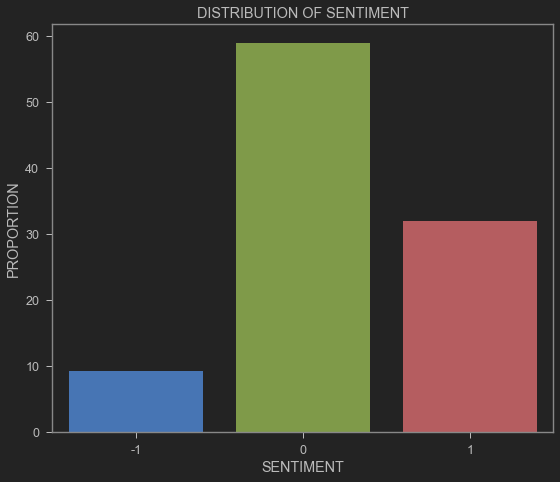

In [17]:
#Checking for the distribution of Sentiment
x=[0,1,-1]
n=df1['Sentiment'].value_counts()/len(df1)*100
sns.barplot(x=x,y=n,data=df1)
plt.title('DISTRIBUTION OF SENTIMENT')
# Set x-axis label
plt.xlabel('SENTIMENT')
# Set y-axis label
plt.ylabel('PROPORTION')
df1['Sentiment'].value_counts()/len(df1)*100

# We notice that distribution of sentiments is clearly imbalanced and can result to biase, One way to make the distribution
# a bit balanced is to employ the 'Augumentation technique' especially to the negative sentiment  

In [22]:
#Applying the Augmentation technique to populate the negative tweets as its quite insignificant
#create an empty dataframe to store augmented text
augmented = pd.DataFrame()
#append augmented text to the empty dataframe and set condition such that the distribution of negative tweet gets up to 22%
t=Wordnet()
neg = df1.loc[df1['Sentiment'] == '-1',]['Sentiment']
for i in neg.index:
    if df1['Sentiment'].value_counts()[-1]/len(df1)*100 <22:
        text_aug = t.augment(str(df1['Tweet_Text'][i]))
        augmented = augmented.append({'Tweet_Text':text_aug ,'Sentiment': df1['Sentiment'][i]} , ignore_index=True)
#append augmented to df1
        df1 = df1.append(augmented)

0     50.516746
1     27.339713
-1    22.143541
Name: Sentiment, dtype: float64

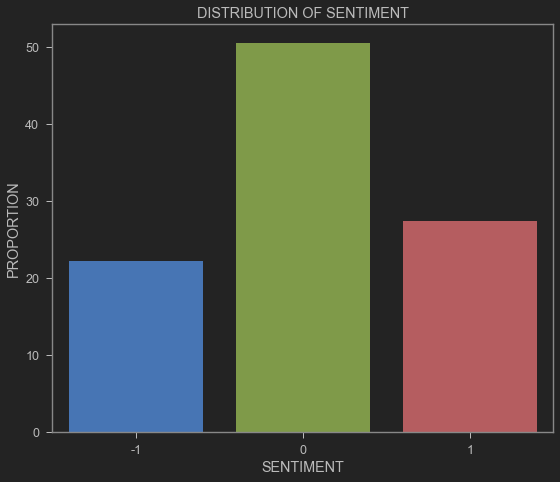

In [23]:
#Checking new status of distribution of Sentiment
x=[0,1,-1]
n=df1['Sentiment'].value_counts()/len(df1)*100
sns.barplot(x=x,y=n,data=df1)
plt.title('DISTRIBUTION OF SENTIMENT')
# Set x-axis label
plt.xlabel('SENTIMENT')
# Set y-axis label
plt.ylabel('PROPORTION')
df1['Sentiment'].value_counts()/len(df1)*100
#The distribution is now balanced

In [24]:
#Also notice that the count of df1 has increased due to the augmentation of negative tweet (from 8965 to 10505)
len(df1)

10450

# TEXTUAL TRANSFORMATION INTO VECTOR USING TF-IDF

In [25]:
#Define the TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  


In [26]:
# Define dependent (y) and independent variable(x)
# Transform independent variable to vector form using defined vectorizer
x=vectorizer.fit_transform(df1['Tweet_Text']).toarray()
y=df1['Sentiment']

# MACHINE LEARNING PROPER 

# SPLITTING  X,Y  INTO TEST AND TRAIN USING STRATIFIED SAMPLING

In [27]:

#Splitting x,y into train and test and in ratio 80:20 
#We use stratified sampling so that the split follows the population distribution
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_index, test_index in split.split(x,y):
    x_train= x[train_index]
    x_test= x[test_index]
    y_train= y.iloc[train_index]
    y_test=y.iloc[test_index]
    

0     50.514354
1     27.344498
-1    22.141148
Name: Sentiment, dtype: float64

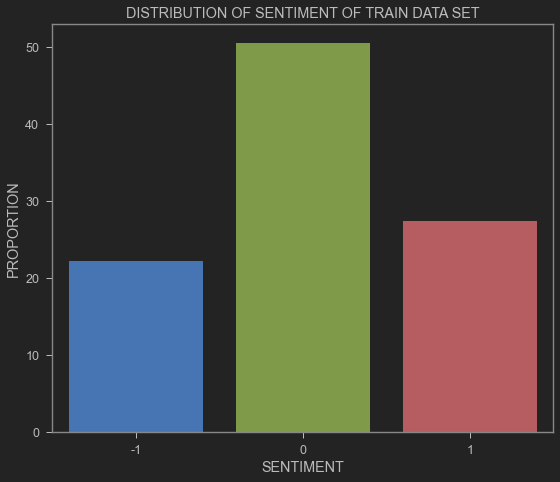

In [28]:
#Checking if distribution in train data set is same with that of its population
x1=[0,1,-1]
n=y_train.value_counts()/len(y_train)*100
sns.barplot(x=x1,y=n,data=df1)
plt.title('DISTRIBUTION OF SENTIMENT OF TRAIN DATA SET')
# Set x-axis label
plt.xlabel('SENTIMENT')
# Set y-axis label
plt.ylabel('PROPORTION')
y_train.value_counts()/len(y_train)*100

#perfect, It maintained same distribution

# ALGORITHM APPLICATION

Here, we applied three algorithm namely:
1. Multinomial Logistics Regression
2. Multinomial Naive Bayes
3. Decision tree

# MULTINOMIAL LOGISTICS REGRESSION

In [29]:
#APPLYING MULTINOMIAL LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x_train, y_train)
logistics_pred=softmax_reg.predict(x_test)
from sklearn import metrics
cnf_matrix_logistics = metrics.confusion_matrix(y_test,logistics_pred)
cnf_matrix_logistics

C:\Users\Ifeanyi Uzowuru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 384,   57,   22],
       [   7, 1029,   20],
       [   6,   81,  484]], dtype=int64)

Text(0.5, 447.52, 'Predicted label')

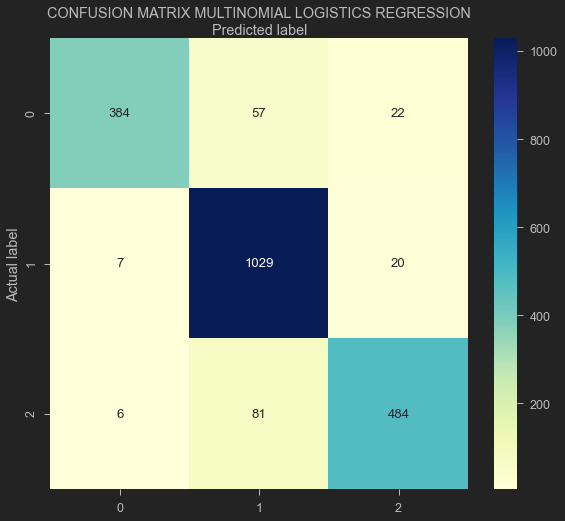

In [30]:
#CONFUSION MATRIX FOR MULTINOMIAL LOGISTIC REGRESSION
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logistics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX MULTINOMIAL LOGISTICS REGRESSION', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#We see that the Multinomial Logistic Regression classified



In [31]:
#Evaluation scores for Multinomial Logistics Regression
from sklearn.metrics import classification_report
print(classification_report(y_test,logistics_pred))

              precision    recall  f1-score   support

          -1       0.97      0.83      0.89       463
           0       0.88      0.97      0.93      1056
           1       0.92      0.85      0.88       571

    accuracy                           0.91      2090
   macro avg       0.92      0.88      0.90      2090
weighted avg       0.91      0.91      0.91      2090



# MULTINOMIAL NAIVE BAYES ALGORITHM

In [32]:
#APPLYING MULTINOMIAL NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)
naive_bayes = NB_classifier.predict(x_test)
confma_bayes = metrics.confusion_matrix(y_test,naive_bayes)
confma_bayes


array([[348,  82,  33],
       [ 27, 963,  66],
       [ 10, 110, 451]], dtype=int64)

Text(0.5, 447.52, 'Predicted label')

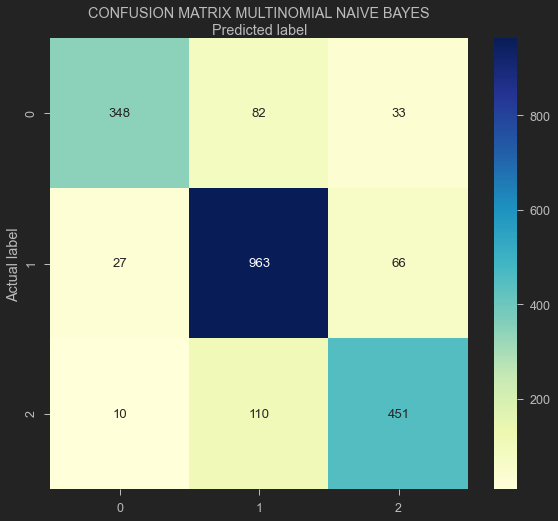

In [33]:
#CONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confma_bayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX MULTINOMIAL NAIVE BAYES', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [34]:
#Evaluation scores for multinomial naive bayes
from sklearn.metrics import classification_report
print(classification_report(y_test, naive_bayes))

              precision    recall  f1-score   support

          -1       0.90      0.75      0.82       463
           0       0.83      0.91      0.87      1056
           1       0.82      0.79      0.80       571

    accuracy                           0.84      2090
   macro avg       0.85      0.82      0.83      2090
weighted avg       0.85      0.84      0.84      2090



#  RANDOM FOREST CLASSIFIER ALGORITHM #

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
print('Libraries Imported')

Libraries Imported


In [36]:
classifier = RandomForestClassifier(n_estimators = 3, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
rand_f = classifier.predict(x_test)
confma_rand = metrics.confusion_matrix(y_test,rand_f)
confma_rand

array([[384,  61,  18],
       [ 24, 992,  40],
       [ 26, 117, 428]], dtype=int64)

Text(0.5, 447.52, 'Predicted label')

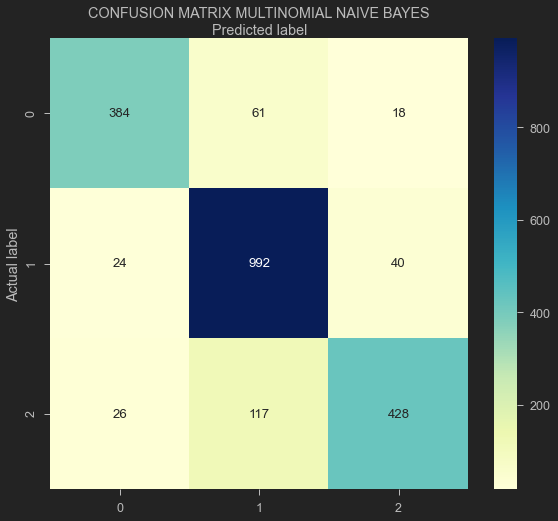

In [37]:
#CONFUSION MATRIX FOR RANDOM FOREST
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confma_rand), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX MULTINOMIAL NAIVE BAYES', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [38]:
#Evaluation scores for random forest
print(classification_report(y_test, rand_f))

              precision    recall  f1-score   support

          -1       0.88      0.83      0.86       463
           0       0.85      0.94      0.89      1056
           1       0.88      0.75      0.81       571

    accuracy                           0.86      2090
   macro avg       0.87      0.84      0.85      2090
weighted avg       0.87      0.86      0.86      2090



# CONCLUSION

In [39]:
#It might be a difficult task to choose which algorithm we would end up with, however lets not deviate away from the 
# goal of the project, which is to get a first hand information about negative tweets of Georgia state university before
#it goes viral and lead to Institutional reputation damage, this implies we should be much more concerned about the accurate
#classification of negative tweets which includes true negatives and false positives that are actually negative and
#false neutralthat are actually negative

# Multinomial logistics Regression: precision,recall,f1 = [0.97 ,0.83, 0.89] for 466 negatives
# Multinomial Naive Bayes: precision,recall,f1 = [0.90 ,0.75, 0.82] for 466 negatives
# Random forest: precision,recall,f1 = [0.88,0.83,0.86] for 466 negatives

# In terms of negative prediction, Multinomial logistics Regression performed the best in classifying correctly negative
# tweets and in its precision power, which is why it has the best f1 score and we thereby confirm the algorithm as our
# model of choice.